In [59]:
import numpy as np
import matplotlib.pyplot as plt

## 畫出線圖
[參考連結](http://onionys.blogspot.tw/2012/01/python-matplotlib.html)

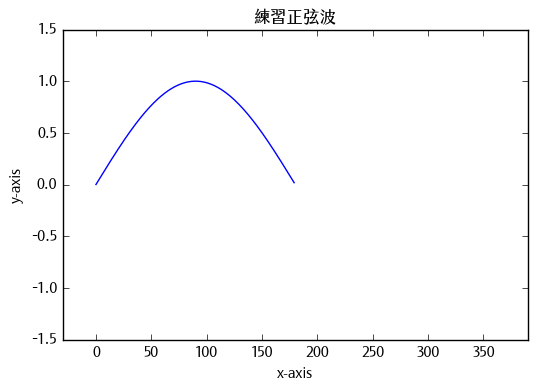

In [2]:
x = np.arange(0,180)
y = np.sin(x * np.pi / 180.0)
# 開始畫圖
# 設定要畫的的x,y數據list....
plt.plot(x,y) 
# 設定圖的範圍, 不設的話，系統會自行決定
plt.xlim(-30,390)
plt.ylim(-1.5,1.5)
# 照需要寫入x 軸和y軸的 label 以及title
plt.xlabel("x-axis") 
plt.ylabel("y-axis") 
plt.title("練習正弦波") 
# 在這個指令之前，都還在做畫圖的動作 
# 這個指令算是 "秀圖" 
plt.show() 
# 如果要存成圖形檔:
# 把 pyplot.show() 換成下面這行:
plt.savefig("sin.png",dpi=300,format="png") 

## 畫出線圖

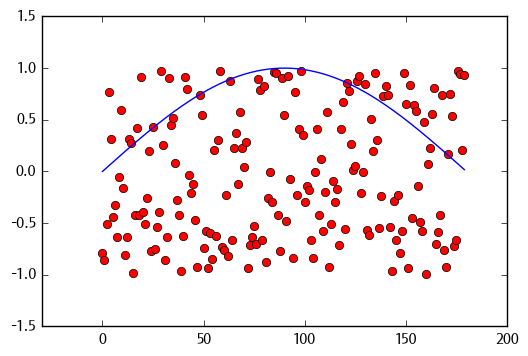

In [3]:
y2 = np.random.rand(len(x))*2 - 1
plt.plot(x,y2,'ro',lw=1)
plt.plot(x,y)
plt.xlim(-30,200)
plt.ylim(-1.5,1.5)
plt.show()

[pokemon data](https://www.openintro.org/stat/data/?data=pokemon)

In [4]:
import requests

In [5]:
url = "https://www.openintro.org/stat/data/pokemon.csv"
import shutil
def getFile(url,save_file):
    response = requests.get(url, stream=True)
    with open(save_file, 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
source_path = './pokemon.csv'
getFile(url,source_path)

In [6]:
#讀檔案
import csv
import pandas as pd

In [7]:
data = pd.read_csv(source_path)

In [8]:
data.head()

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new,notes
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500,2,Tackle,Normal,...,1.24,2500,2,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
1,Pidgey2,Pidgey,366,54,1.67,0.29,2500,2,Quick Attack,Normal,...,1.05,2500,2,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
2,Pidgey3,Pidgey,353,55,1.94,0.30,3000,3,Quick Attack,Normal,...,1.11,3000,3,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
3,Pidgey4,Pidgey,338,51,1.73,0.31,3000,3,Tackle,Normal,...,1.12,3000,3,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
4,Pidgey5,Pidgey,242,45,1.44,0.27,1900,2,Quick Attack,Normal,...,0.98,1900,2,Wing Attack,Flying,9,Twister,Dragon,25,NaN


In [9]:
data_source = data[['cp','cp_new']]

In [10]:
data['r'] = np.random.rand(len(data))

In [11]:
traning_size = int(len(data)*0.8)
traning_data = data.sort_values(by="r")[0:traning_size]
test_data = data.sort_values(by="r")[traning_size:]


In [12]:
a = data.head(4)[['cp','cp_new']]
a

,cp,cp_new
0,384,694
1,366,669
2,353,659
3,338,640


In [13]:
x = a['cp']
y = a['cp_new']

In [14]:
f = lambda x: x*2

In [15]:
x.map(f)

0    768
1    732
2    706
3    676
Name: cp, dtype: int64

In [16]:
y - x.map(f)

0   -74
1   -63
2   -47
3   -36
dtype: int64

In [17]:
np.power(y - x.map(f),2)

0    5476
1    3969
2    2209
3    1296
dtype: int64

In [18]:
np.mean(np.power(y - x.map(f),2))

3237.5

In [19]:
def loss_function(f,x,y):
    return np.sum(np.power(y - x.map(f),2))

In [20]:
loss_function(lambda x:x*2,a['cp'],a['cp_new'])

12950

In [21]:
def L(w,b):
    f = lambda x:w*x+b
    return loss_function(f,a['cp'],a['cp_new'])

In [22]:
L(2,0)

12950

In [23]:
b = np.linspace(-200, -100, 100)
w = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(w, b)


In [24]:
L(X,Y)[0,0]

28489473.0

In [25]:
X[0,0]

-5.0

In [26]:
Y[0,0]

-200.0

In [27]:
L(-5,-200)

28489473

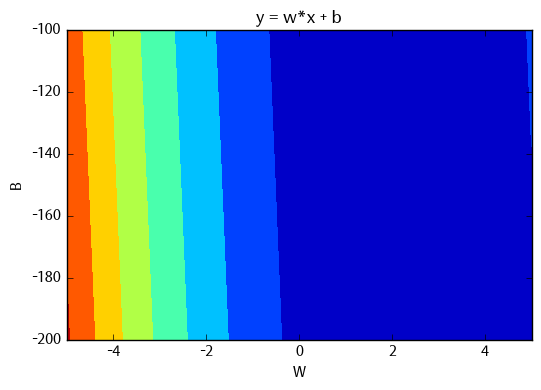

In [28]:
# contour 作圖
# http://stackoverflow.com/questions/15601096/contour-graph-in-python
#fig, axs = plt.subplots(1,2)
b = np.linspace(-200, -100, 100)
w = np.linspace(-5, 5, 100)
W, B = np.meshgrid(w, b)
Z = L(W,B)

#levels = np.linspace(-1, 1, 40)

#zdata = np.sin(8*X)*np.sin(8*Y)
plt.xlabel("W") 
plt.ylabel("B") 
plt.title("y = w*x + b") 
plt.contourf(W,B,Z)
#cs = axs[0].contourf(X, Y, zdata, levels=levels)
#fig.colorbar(cs, ax=axs[0], format="%.2f")
#cs = axs[1].contourf(X, Y, zdata, levels=[-1,0,1])
#fig.colorbar(cs, ax=axs[1])
plt.show()

In [29]:
# Gradient Descent
# n = learning rate
# L = \sum (y - (w*x +b)) ^2 / n
# dL/dw = \sum 2 (y - (w*x)+b) * (-x) / n =  - 2/n \sum (x*y - wx^2 - b*x)
# dL/db = \sum 2 (y - (w*x)+b)/n * (-1) = -2/n \sum (y - w*x + b)



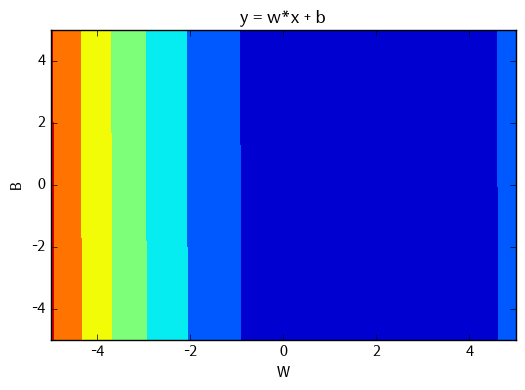

In [30]:
b = np.linspace(-5, 5, 100)
w = np.linspace(-5, 5, 100)
W, B = np.meshgrid(w, b)
Z = L(W,B)
plt.xlabel("W") 
plt.ylabel("B") 
plt.title("y = w*x + b") 
plt.contourf(W,B,Z)
plt.show()

In [31]:
x

0    384
1    366
2    353
3    338
Name: cp, dtype: int64

In [32]:
y

0    694
1    669
2    659
3    640
Name: cp_new, dtype: int64

In [97]:
w = 2
Grw = 0
b = 1
Grb = 0
eta = 1
rounds = 1

In [93]:

#Adagrad

#x = pd.Series(np.array([1,2,3,4]))
#y = 2*x +2 + np.random.rand(len(x))*0.3
#x = pd.Series(np.array([384,366,353,338]))
#y = pd.Series(np.array([694,669,659,640]))
#x = a['cp']
#y = a['cp_new']
#y = 2*x + 2
x0 = pd.Series(np.array([1,2,3]))*200
y0 = x*2 +2

x = (x0 - np.mean(x0)) / np.std(x0)
y = (x0 - np.mean(y0)) / np.std(y0)



def loss_function(w,b,x,y):
    f = lambda t:w*t+b
    return np.sum(np.power(y - x.map(f),2))

def calc_epoc(w,b,x,y,eta,Grw,Grb,rounds):
    Gw = np.sum(2*(y - (w*x+b))*(-x))
    Grw += np.power(Gw,2)
    w = w - (eta / np.sqrt(Grw)) * Gw
    Gb = np.sum(2*(y - (w*x+b))*(-1))
    Grb += np.power(Gb,2)
    b = b - (eta / np.sqrt(Grb)) * Gb
    t = loss_function(w,b,x,y)
    rounds += 1
    print("w:%.3f b:%.3f eta:%.3f loss:%.3f rounds:%d"%(w,b,eta,t,rounds))
    return [w,b,Grw,Grb,rounds,t]
    


def next_W(w,b,n,x,y,rounds):        
    return w + 2*n*np.sum(x*(y-w*x-b)) / np.sqrt()
def next_B(w,b,n,x,y,rounds):
    return b + 2*n*np.sum(y - x*w - b)

#t = L(w,b,x,y)
#print("w:%.2f b:%.2f n:%.2f loss:%.2f rounds:%d"%(w,b,eta,t,rounds))

In [94]:
x

0   -1.224745
1    0.000000
2    1.224745
dtype: float64

In [95]:
y

0   -1.843241
1   -1.230869
2   -0.618496
dtype: float64

In [98]:
[w,b,Grw,Grb,rounds,t] = calc_epoc(w,b,x,y,eta,Grw,Grb,rounds)

w:1.000 b:0.000 eta:1.000 loss:5.295 rounds:2


In [99]:
[w,b,Grw,Grb,rounds,t] = calc_epoc(w,b,x,y,eta,Grw,Grb,rounds)

w:0.684 b:-0.483 eta:1.000 loss:1.779 rounds:3


In [100]:
while rounds<300 and t>1e-5:
    [w,b,Grw,Grb,rounds,t] = calc_epoc(w,b,x,y,eta,Grw,Grb,rounds)

w:0.568 b:-0.765 eta:1.000 loss:0.666 rounds:4
w:0.525 b:-0.938 eta:1.000 loss:0.260 rounds:5
w:0.509 b:-1.046 eta:1.000 loss:0.103 rounds:6
w:0.504 b:-1.114 eta:1.000 loss:0.041 rounds:7
w:0.501 b:-1.157 eta:1.000 loss:0.016 rounds:8
w:0.500 b:-1.184 eta:1.000 loss:0.007 rounds:9
w:0.500 b:-1.201 eta:1.000 loss:0.003 rounds:10
w:0.500 b:-1.212 eta:1.000 loss:0.001 rounds:11
w:0.500 b:-1.219 eta:1.000 loss:0.000 rounds:12
w:0.500 b:-1.223 eta:1.000 loss:0.000 rounds:13
w:0.500 b:-1.226 eta:1.000 loss:0.000 rounds:14
w:0.500 b:-1.228 eta:1.000 loss:0.000 rounds:15
w:0.500 b:-1.229 eta:1.000 loss:0.000 rounds:16
w:0.500 b:-1.230 eta:1.000 loss:0.000 rounds:17


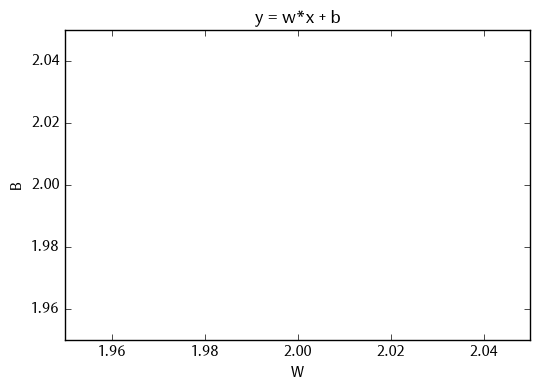

In [36]:
# http://matplotlib.org/examples/pylab_examples/contour_demo.html
bL = np.linspace(1.95, 2.05, 100)
wL = np.linspace(1.95, 2.05, 100)
W, B = np.meshgrid(wL, bL)
Z = L(W,B,x,y)
plt.xlabel("W") 
plt.ylabel("B") 
plt.title("y = w*x + b") 
levels = np.linspace(-0.005,0.005,21)
CS = plt.contour(W,B,Z,levels=levels)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

In [37]:
#np.power(x.map(lambda x:w0*x+b0) - y,2)

In [38]:
#x.map(lambda x:w0*x+b0) 

In [39]:
#y

In [40]:
w1 = next_W(w,b,n,x,y)
b1 = next_B(w,b,n,x,y)
t1 = L(w1,b1,x,y)
rounds = rounds + 1
print("w:%.2f b:%.2f n:%.2f loss:%.2f rounds:%d"%(w,b,n,t1,rounds))

w:2.00 b:100.00 n:0.10 loss:309784411243009.94 rounds:2


In [41]:
if t1 > t:
    n = n /2
    w1 = next_W(w,b,n,x,y)
    b1 = next_B(w,b,n,x,y)
    t1 = L(w1,b1,x,y)
    rounds = rounds + 1
    print("w:%.2f b:%.2f n:%.6f loss:%.2f rounds:%d"%(w1,b1,n,t1,rounds))

w:-11758.00 b:70.60 n:0.050000 loss:77444719847717.89 rounds:3


In [42]:
print("w:%.2f b:%.2f n:%.6f loss:%.2f rounds:%d"%(w1,b1,n,t1,rounds))

w:-11758.00 b:70.60 n:0.050000 loss:77444719847717.89 rounds:3


In [43]:
w2 = next_W(w2,b2,n,x,y)
b2 = next_B(w2,b2,n,x,y)
t2 = L(w1,b1,x,y)
rounds = rounds + 1
print("w:%.2f b:%.2f n:%.6f loss:%.2f rounds:%d"%(w2,b2,n,t2,rounds))

NameError: name 'w2' is not defined

In [ ]:
while t>1e-5 and rounds < 300:
    w = next_W(w,b,n,x,y)
    b = next_B(w,b,n,x,y)
    t = L(w,b,x,y)    
    print("w:%.2f b:%.2f loss:%.2f rounds:%d"%(w,b,t,rounds))
    rounds = rounds+1
    n = 0.1
#    n = n * (1 - 1/rounds)
#Vanllia Gradient Decent
#Adagrad 
#Stochastic
#Feature Scaling